#                                          Prediction of Heart Disease using the optimal risk factors 

In [1]:
#import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")


## 1. Import the data

In [2]:
#Read the dataset
df = pd.read_csv("Analysis_of_Heartdisease.csv")
df.head()

,index,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Numberofvesselsfluro,Thallium,HeartDisease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
#summary of the original dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 270 non-null    int64  
 1   Age                   270 non-null    int64  
 2   Sex                   270 non-null    int64  
 3   Chest_pain_type       270 non-null    int64  
 4   BP                    270 non-null    int64  
 5   Cholesterol           270 non-null    int64  
 6   FBS_over_120          270 non-null    int64  
 7   EKG_results           270 non-null    int64  
 8   Max_HR                270 non-null    int64  
 9   Exercise_angina       270 non-null    int64  
 10  ST_depression         270 non-null    float64
 11  Slope_of_ST           270 non-null    int64  
 12  Numberofvesselsfluro  270 non-null    int64  
 13  Thallium              270 non-null    int64  
 14  HeartDisease          270 non-null    object 
dtypes: float64(1), int64(13

## 2. Pre-processing

In [4]:
#Drop the index column
df=df.drop(['index'], axis='columns')
#convert target variable into numerical value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = df
df2.HeartDisease = le.fit_transform(df2.HeartDisease)
df2.head()


,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Numberofvesselsfluro,Thallium,HeartDisease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [5]:
#size of the dataframe
df2.shape

(270, 14)

Text(0.5, 1.0, 'Box Plot after outlier removal')

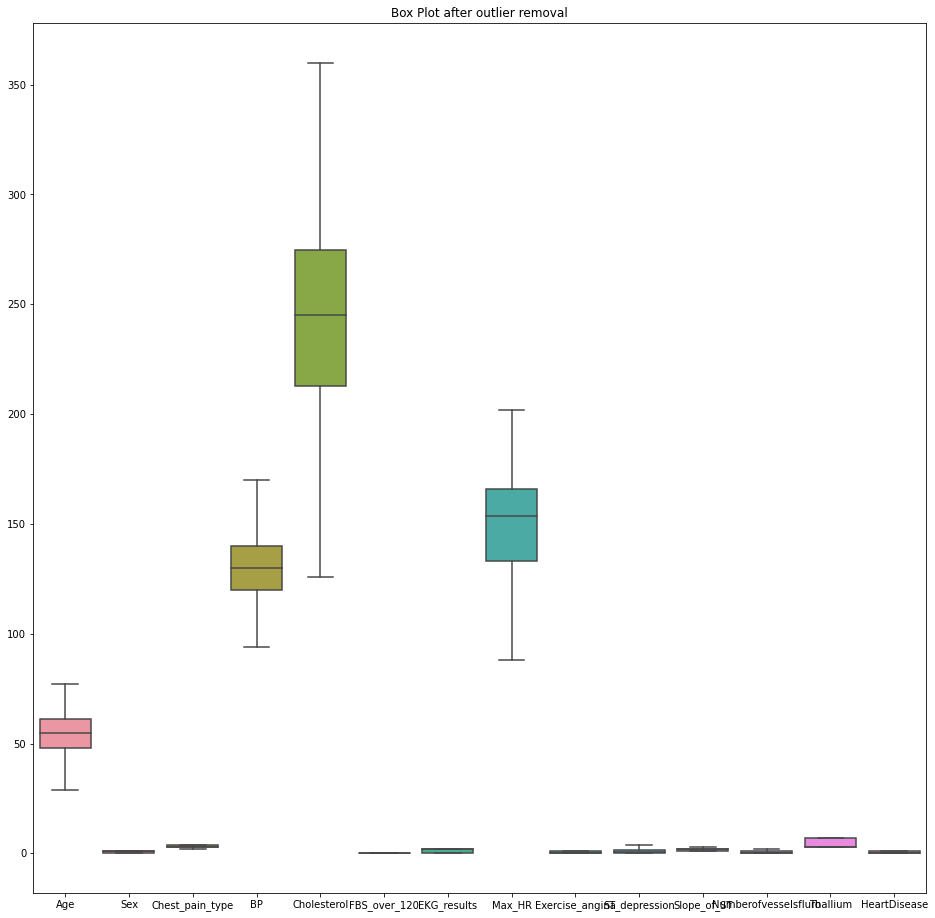

In [6]:
df1=df2
# Remove outliers for BP column
q1 = df1['BP'].quantile(0.25)
q3 = df1['BP'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df1['BP'])
for i in df1['BP']:
    if i > Upper_tail or i < Lower_tail:
            df1['BP'] = df1['BP'].replace(i, med)
# Remove outliers for Cholesterol column
q1 = df1['Cholesterol'].quantile(0.25)
q3 = df1['Cholesterol'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df1['Cholesterol'])
for i in df1['Cholesterol']:
    if i > Upper_tail or i < Lower_tail:
            df1['Cholesterol'] = df1['Cholesterol'].replace(i, med)

# Remove outliers for Thallium column
q1 = df1['Thallium'].quantile(0.25)
q3 = df1['Thallium'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df1['Thallium'])
for i in df1['Thallium']:
    if i > Upper_tail or i < Lower_tail:
            df1['Thallium'] = df1['Thallium'].replace(i, med)

# Remove outliers for ST_depression column
q1 = df1['ST_depression'].quantile(0.25)
q3 = df1['ST_depression'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df1['ST_depression'])
for i in df1['ST_depression']:
    if i > Upper_tail or i < Lower_tail:
            df1['ST_depression'] = df1['ST_depression'].replace(i, med)
            
# Remove outliers for fbs column
q1 = df1['FBS_over_120'].quantile(0.25)
q3 = df1['FBS_over_120'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df1['FBS_over_120'])
for i in df1['FBS_over_120']:
    if i > Upper_tail or i < Lower_tail:
            df1['FBS_over_120'] = df1['FBS_over_120'].replace(i, med)
# Remove outliers for Chest_pain_type column
q1 = df1['Chest_pain_type'].quantile(0.25)
q3 = df1['Chest_pain_type'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df1['Chest_pain_type'])
for i in df1['Chest_pain_type']:
    if i > Upper_tail or i < Lower_tail:
            df1['Chest_pain_type'] = df1['Chest_pain_type'].replace(i, med)
# Remove outliers for Numberofvesselsfluro column
q1 = df1['Numberofvesselsfluro'].quantile(0.25)
q3 = df1['Numberofvesselsfluro'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df1['Numberofvesselsfluro'])
for i in df1['Numberofvesselsfluro']:
    if i > Upper_tail or i < Lower_tail:
            df1['Numberofvesselsfluro'] = df1['Numberofvesselsfluro'].replace(i, med)
# Remove outliers for Max_HR column
q1 = df1['Max_HR'].quantile(0.25)
q3 = df1['Max_HR'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df1['Max_HR'])
for i in df1['Max_HR']:
    if i > Upper_tail or i < Lower_tail:
            df1['Max_HR'] = df1['Max_HR'].replace(i, med)
plt.figure(figsize=(16,16))
sns.boxplot (data= df1)
plt.title("Box Plot after outlier removal")


In [7]:
cleaned_data= df1
cleaned_data.head()
cleaned_data.shape

(270, 14)

In [8]:
scaler = StandardScaler()
categorical_vars = ['Sex','Exercise_angina','Numberofvesselsfluro','Chest_pain_type','EKG_results','Slope_of_ST','Thallium']
continuous_vars = ["Age","BP","Cholesterol","Max_HR","ST_depression",'FBS_over_120']
# encoding the categorical columns
data1 = pd.get_dummies(cleaned_data, columns = categorical_vars)
X = data1.drop(['HeartDisease'],axis=1)
y = data1[['HeartDisease']]
# Scaling the continuous columns
data1[continuous_vars] = scaler.fit_transform(X[continuous_vars])
data1.head()


,Age,BP,Cholesterol,FBS_over_120,Max_HR,ST_depression,HeartDisease,Sex_0,Sex_1,Exercise_angina_0,...,Chest_pain_type_4,EKG_results_0,EKG_results_1,EKG_results_2,Slope_of_ST_1,Slope_of_ST_2,Slope_of_ST_3,Thallium_3,Thallium_6,Thallium_7
0,1.712094,0.024742,1.734128,0.0,-1.811761,1.375507,1,0,1,1,...,1,0,0,1,0,1,0,1,0,0
1,1.382140,-0.967375,-0.024703,0.0,0.442809,0.596714,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
2,0.282294,-0.372105,0.340768,0.0,-0.397129,-0.668825,1,0,1,1,...,0,1,0,0,1,0,0,0,0,1
3,1.052186,-0.107541,0.386452,0.0,-1.988590,-0.766174,0,0,1,0,...,1,1,0,0,0,1,0,0,0,1
4,2.152032,-0.636670,0.523504,0.0,-1.281274,-0.766174,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0


## 3. Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation between variables')

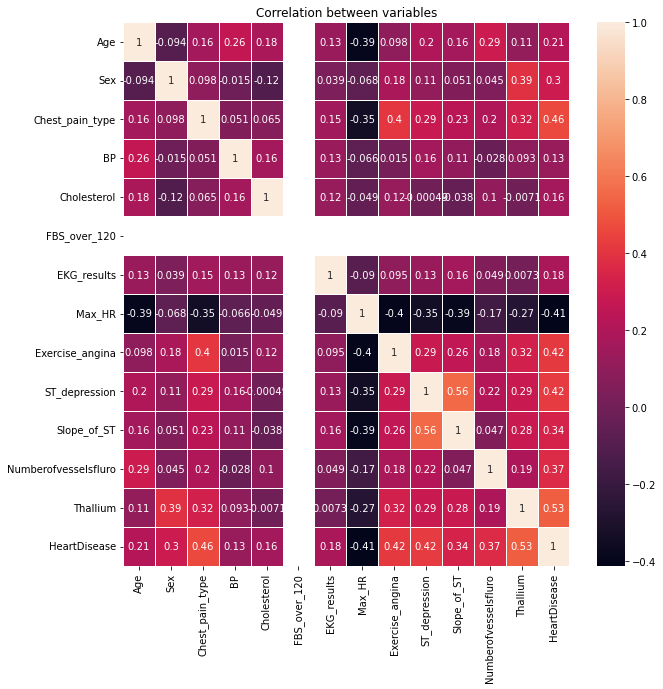

In [9]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(cleaned_data.corr(),annot= True, linewidth=0.5)
plt.title("Correlation between variables")

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

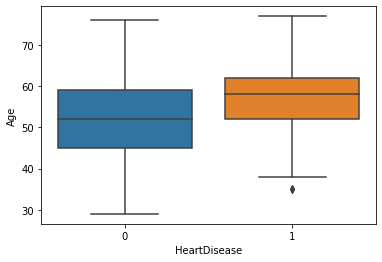

In [10]:
sns.boxplot(data=cleaned_data, y="Age",x="HeartDisease")

<AxesSubplot:xlabel='HeartDisease', ylabel='BP'>

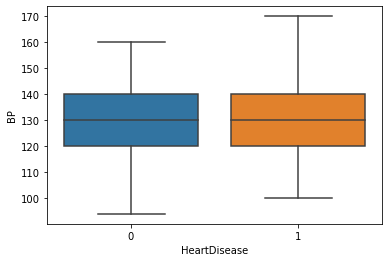

In [11]:
sns.boxplot(data=cleaned_data, y="BP",x="HeartDisease")

<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

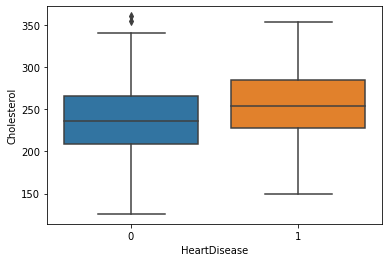

In [12]:
sns.boxplot(data=cleaned_data, y="Cholesterol",x="HeartDisease")

## 4. Feature selection using Recursive feature elimination method using Random forest classifier

In [13]:
# defining the features and target
X1 = data1.drop(['HeartDisease'],axis=1)
y1 = data1[['HeartDisease']]

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

rfe_method = RFE(RandomForestClassifier(n_estimators=10, random_state=10),
    n_features_to_select=9,step=2)

rfe_method.fit(X_train1, y_train1)
X_train1.columns[(rfe_method.get_support())] 

Index(['Age', 'BP', 'Cholesterol', 'Max_HR', 'ST_depression',
       'Exercise_angina_1', 'Chest_pain_type_4', 'Thallium_3', 'Thallium_7'],
      dtype='object')

8 features would give 81% accuracy 
10 features would give 88% accuracy
Hence 9 features are selected

## 5. Linear Regression Model

In [15]:
#Training the model with best risk factors
X_features=X1[['Age', 'BP', 'Cholesterol', 'Max_HR', 'ST_depression',
       'Numberofvesselsfluro_0', 'Chest_pain_type_4', 'Thallium_3',
       'Thallium_7']]
Y_features= y1[['HeartDisease']]

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, Y_features, test_size=0.30, random_state=30)

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [17]:
#To predict success rate
y_test_pred = pd.DataFrame(model.predict(X_test), index = y_test.index, columns = ['Disease_prediction'])
results_rf = y_test.join(y_test_pred)

results_rf['Success'] = (results_rf['HeartDisease'] == results_rf['Disease_prediction']).astype(int)
results_rf

,HeartDisease,Disease_prediction,Success
245,1,1,1
128,0,0,1
1,0,0,1
64,0,0,1
85,0,0,1
...,...,...,...
88,0,0,1
222,0,0,1
118,0,0,1
155,0,0,1


In [18]:
#Print the otput using classification_report and confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_test_pred))
confusion_matrix(y_test, y_test_pred)


              precision    recall  f1-score   support

           0       0.89      0.96      0.92        50
           1       0.93      0.81      0.86        31

    accuracy                           0.90        81
   macro avg       0.91      0.88      0.89        81
weighted avg       0.90      0.90      0.90        81



array([[48,  2],
       [ 6, 25]], dtype=int64)

In [19]:
#Determing the accuracy score
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,y_test_pred)
print ("Logistic testing accuracy is ", round(accuracy,2) * 100, "%")

Logistic testing accuracy is  90.0 %


Text(0, 0.5, 'True Positive Rate')

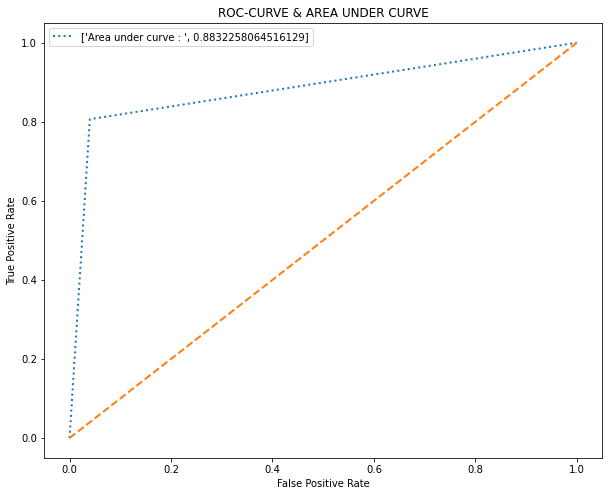

In [20]:
#To display the ROC-AUC curve
from sklearn.metrics import roc_auc_score,roc_curve,auc
fpr , tpr , thresholds   = roc_curve(y_test,y_test_pred)
    
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111)
ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
plt.legend(loc="best")
plt.title("ROC-CURVE & AREA UNDER CURVE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

For your refernce, the below accuracy is obtained for the dataset without selecting the best risk factors

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_clean = cleaned_data.drop(['HeartDisease'],axis=1)
y_clean = cleaned_data[['HeartDisease']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_clean, y_clean, test_size=0.30, random_state=30)

model = LogisticRegression()
model.fit(X_train1,y_train1)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test1,y_test_pred1))
confusion_matrix(y_test1, y_test_pred1)



NameError: name 'y_test_pred1' is not defined